In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

Let's look at three different ways to find outliers in data that has been validated for accuracy already:

1. Leverages
2. Studentized or Jackknife Residuals
3. Cook's Distance

In [41]:
df = pd.read_csv('ashingtonpark2.csv')
df.head()

,ID,AddressNo,Street,Sqft,LandSqft,Neighbors,Stories,Pool,Bedrooms,Bathrooms,DateLastSold,PropertyTaxes2022,OwnedByBank,OuterPortion,NextToLoudRoad,PriceLastSold,ZestimateOct2022,ZestimateMay2022,RentZestimate,RealtorcomEstimate,RedfinEstimate,TruliaEstimate,OCPALandValue2022,OCPABuildingValue2022,OCPAFeaturesValue2022,OCPAMarketValue2022,OCPAAssessedValue2022,OCPALandValue2021,OCPABuildingValue2021,OCPAFeaturesValue2021,OCPAMarketValue2021,OCPAAssessedValue2021,Notes,ZestimateChange,MonthsSinceLastSold,Originally Missing,TaxRate2022
0,1,4755,Willamette Cir,2250,5895,2,2,0.0,6,3,2019-06-12,5081.46,0,1.0,1,280000,434500.0,436000.0,2799,334300.0,441955,434500.0,60000.0,261569.0,1000.0,322569.0,287978.0,52000.0,208798.0,1000.0,261798.0,261798.0,NaN,-1500.0,40.0,0,0.017645
1,2,4761,Willamette Cir,1264,5893,2,1,0.0,3,2,2022-04-29,389.40,0,1.0,1,375000,403900.0,355000.0,2399,381600.0,399974,403900.0,60000.0,186280.0,0.0,246280.0,183775.0,52000.0,147806.0,0.0,199806.0,178422.0,"No Trulia Estimate, recently sold, and very lo...",48900.0,5.0,1,0.002119
2,3,4767,Willamette Cir,1454,5770,2,1,0.0,3,2,2002-11-21,1647.60,0,1.0,1,129600,362400.0,351600.0,2379,354900.0,390243,362400.0,60000.0,192309.0,1000.0,253309.0,120675.0,52000.0,152401.0,1000.0,205401.0,117160.0,NaN,10800.0,239.0,0,0.013653
3,4,4773,Willamette Cir,2250,7933,2,2,0.0,3,3,2002-09-13,5170.68,0,1.0,1,155600,424300.0,416300.0,2834,438400.0,430498,424300.0,60000.0,268261.0,1500.0,329761.0,292700.0,52000.0,212591.0,1500.0,266091.0,266091.0,NaN,8000.0,241.0,0,0.017665
4,5,4779,Willamette Cir,1855,10747,2,1,0.0,3,2,2012-10-10,4684.08,0,1.0,1,150500,400700.0,397300.0,2527,387100.0,413916,400700.0,60000.0,235139.0,0.0,295139.0,263669.0,52000.0,187699.0,0.0,239699.0,239699.0,NaN,3400.0,120.0,0,0.017765


In [42]:
df.columns

Index(['ID', 'AddressNo', 'Street', 'Sqft', 'LandSqft', 'Neighbors', 'Stories',
       'Pool', 'Bedrooms', 'Bathrooms', 'DateLastSold', 'PropertyTaxes2022',
       'OwnedByBank', 'OuterPortion', 'NextToLoudRoad', 'PriceLastSold',
       'ZestimateOct2022', 'ZestimateMay2022', 'RentZestimate',
       'RealtorcomEstimate', 'RedfinEstimate', 'TruliaEstimate',
       'OCPALandValue2022', 'OCPABuildingValue2022', 'OCPAFeaturesValue2022',
       'OCPAMarketValue2022', 'OCPAAssessedValue2022', 'OCPALandValue2021',
       'OCPABuildingValue2021', 'OCPAFeaturesValue2021', 'OCPAMarketValue2021',
       'OCPAAssessedValue2021', 'Notes', 'ZestimateChange',
       'MonthsSinceLastSold', 'Originally Missing', 'TaxRate2022'],
      dtype='object')

Let's look into predicting 'ZestimateOct2022' from the following predictors:

1. Sqft
2. PropertyTaxes2022
3. MonthsSinceLastSold
4. PriceLastSold

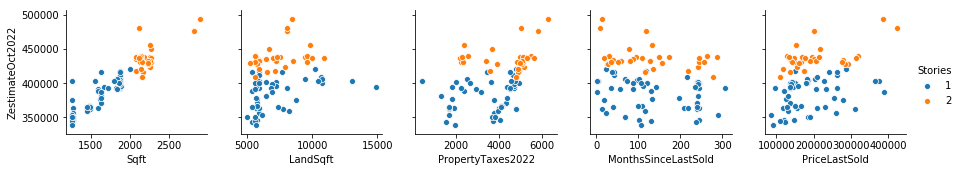

In [43]:
ivcols1 = ['Sqft','LandSqft','PropertyTaxes2022','MonthsSinceLastSold','PriceLastSold']
sns.pairplot(data=df,
            x_vars=ivcols1,
            y_vars=['ZestimateOct2022'],
            hue='Stories')

In this case, we have 5 predictor variables. Out of all of them, Sqft appears to have the strongest relationship with ZestimateOct2022. First, let's look into the leverage:

In [44]:
X = df[ivcols1].values.reshape(-1,len(ivcols1))
y = df['ZestimateOct2022'].values.reshape(-1,1)
u = np.ones(len(X),dtype=int).reshape(-1,1)
X = np.concatenate((u,X),axis=1)
def lsrs(X,Y):
    A = np.linalg.inv(np.matmul(X.T,X))
    C = np.matmul(X.T,Y)
    return np.matmul(A,C)
b = lsrs(X,y)
b

array([[ 2.32186913e+05],
       [ 8.48265653e+01],
       [ 1.32827658e+00],
       [-2.59999088e+00],
       [-1.08846594e+01],
       [ 8.69051135e-02]])

Let's look at our predictions:

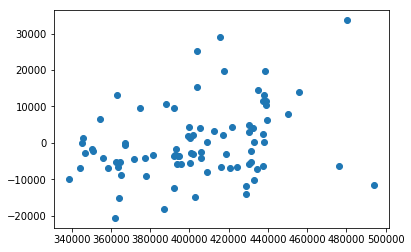

In [45]:
y_hat = np.matmul(X,b)
import matplotlib.pyplot as plt
plt.scatter(y,y-y_hat)

Ok, so to get our leverages, we need the diagonal of the 'Hat Matrix', which can be done as follows:

(array([24., 36., 12.,  7.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([0.02735462, 0.05098429, 0.07461396, 0.09824363, 0.1218733 ,
        0.14550297, 0.16913264, 0.19276231, 0.21639198, 0.24002165,
        0.26365131]),
 <a list of 10 Patch objects>)

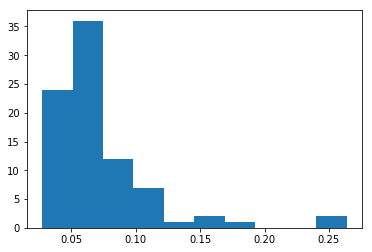

In [46]:
Hat_mat = np.matmul(X,np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T))
leverages = Hat_mat.diagonal()
plt.hist(leverages)

So for the leverages, we need to figure out our critical value first:

Reject if $H_{ii} > 2*\frac{k+1}{N}$

All values for the leverages are between 0 and 1:

In [47]:
critical_hat = 2*len(b)/len(y)
critical_hat

0.1411764705882353

In [48]:
lev1rows = np.where(leverages > critical_hat)
pd.set_option('max_columns', None)
df.loc[lev1rows]

,ID,AddressNo,Street,Sqft,LandSqft,Neighbors,Stories,Pool,Bedrooms,Bathrooms,DateLastSold,PropertyTaxes2022,OwnedByBank,OuterPortion,NextToLoudRoad,PriceLastSold,ZestimateOct2022,ZestimateMay2022,RentZestimate,RealtorcomEstimate,RedfinEstimate,TruliaEstimate,OCPALandValue2022,OCPABuildingValue2022,OCPAFeaturesValue2022,OCPAMarketValue2022,OCPAAssessedValue2022,OCPALandValue2021,OCPABuildingValue2021,OCPAFeaturesValue2021,OCPAMarketValue2021,OCPAAssessedValue2021,Notes,ZestimateChange,MonthsSinceLastSold,Originally Missing,TaxRate2022
1,2,4761,Willamette Cir,1264,5893,2,1,0.0,3,2,2022-04-29,389.40,0,1.0,1,375000,403900.0,355000.000000,2399,381600.0,399974,403900.0,60000.0,186280.0,0.0,246280.0,183775.0,52000.0,147806.0,0.0,199806.0,178422.0,"No Trulia Estimate, recently sold, and very lo...",48900.000000,5.0,1,0.002119
10,11,4531,Willamette Cir,2888,8456,2,2,0.0,5,3,2021-07-30,6312.61,0,1.0,0,387300,493800.0,475000.000000,2895,461600.0,502667,493800.0,60000.0,318499.0,3228.0,381727.0,381727.0,52000.0,253831.0,3228.0,309059.0,309059.0,NaN,18800.000000,14.0,0,0.016537
50,51,4220,Newtonhall Dr,1662,14876,3,1,0.0,3,2,2003-03-12,1815.49,0,1.0,1,137500,394000.0,386849.967033,2355,374900.0,383471,394000.0,60000.0,220071.0,1500.0,281571.0,130301.0,52000.0,175730.0,1500.0,229230.0,126506.0,First entry I've seen with a entry from before...,7150.032967,235.0,1,0.013933
82,83,4201,Newtonhall Dr,2120,8084,3,2,1.0,4,3,2022-02-09,5028.62,1,0.0,0,425000,480200.0,473602.949385,2614,425800.0,475548,425000.0,60000.0,238984.0,16135.0,315119.0,285416.0,52000.0,190834.0,16635.0,259469.0,259469.0,NaN,6597.050615,8.0,1,0.017619
83,84,4223,Mendenwood Ln,1557,13031,5,1,1.0,3,2,2016-07-29,4558.34,0,1.0,0,226500,403800.0,396712.835096,2268,395500.0,394189,403800.0,60000.0,202767.0,20000.0,282767.0,256567.0,52000.0,160743.0,20500.0,233243.0,233243.0,NaN,7087.164904,74.0,1,0.017767


So these would be the houses that are outliers within our set of independent variables. Some sources list the critical value as the ratio of parameters to sample size multiplied by 3 instead of 2:

In [49]:
lev2rows = np.where(leverages > 1.5*critical_hat)
pd.set_option('max_columns', None)
df.loc[lev2rows]

,ID,AddressNo,Street,Sqft,LandSqft,Neighbors,Stories,Pool,Bedrooms,Bathrooms,DateLastSold,PropertyTaxes2022,OwnedByBank,OuterPortion,NextToLoudRoad,PriceLastSold,ZestimateOct2022,ZestimateMay2022,RentZestimate,RealtorcomEstimate,RedfinEstimate,TruliaEstimate,OCPALandValue2022,OCPABuildingValue2022,OCPAFeaturesValue2022,OCPAMarketValue2022,OCPAAssessedValue2022,OCPALandValue2021,OCPABuildingValue2021,OCPAFeaturesValue2021,OCPAMarketValue2021,OCPAAssessedValue2021,Notes,ZestimateChange,MonthsSinceLastSold,Originally Missing,TaxRate2022
1,2,4761,Willamette Cir,1264,5893,2,1,0.0,3,2,2022-04-29,389.40,0,1.0,1,375000,403900.0,355000.000000,2399,381600.0,399974,403900.0,60000.0,186280.0,0.0,246280.0,183775.0,52000.0,147806.0,0.0,199806.0,178422.0,"No Trulia Estimate, recently sold, and very lo...",48900.000000,5.0,1,0.002119
50,51,4220,Newtonhall Dr,1662,14876,3,1,0.0,3,2,2003-03-12,1815.49,0,1.0,1,137500,394000.0,386849.967033,2355,374900.0,383471,394000.0,60000.0,220071.0,1500.0,281571.0,130301.0,52000.0,175730.0,1500.0,229230.0,126506.0,First entry I've seen with a entry from before...,7150.032967,235.0,1,0.013933


For these two homes, they have a high leverage because index 1 has an unusually low value for PropertyTaxes2022 whereas for index 50, there is a unusually high value for LandSqft. Of the leverage outliers for the list with 5 values, which includes these two values, index 10 has a unusually high value for Sqft, which we think is the best predictor here, and has a very high value for PropertyTax2022 as well. Index 82 was recently sold (as were indices 1 and 10) so the MonthsSinceLastSold values are relatively low compared to the rest of the samples, whereas index 83 has a high value for LandSqft. So these data points have a relatively high degree of leverage on the dataset. Mathematically, leverage can be represented by the following relation:

$H_{ii} = \frac{\partial \hat{Y_i}}{\partial Y_i}$

Next, we can look into the studentized residuals:

$r_{-i}$ = $\frac{Y_{i} - \hat{Y_{i}}}{s_{-i}*\sqrt{1-H_{ii}}}$

Where:

$s_{-i}$ is the standard deviation of the variable without the $i^{th}$ observation. This has a T-distribution with n-k-2 degrees of freedom if we neglect any dependence between residuals. Ok, so straight away, we need to figure out some way to get the jackknife residual efficiently, because computing a sum for the standard deviation might be really inefficient if we have a large dataset.

(array([ 1.,  0.,  1.,  1.,  0.,  3.,  5.,  4., 24., 46.]),
 array([32244.91669744, 32395.2045891 , 32545.49248077, 32695.78037243,
        32846.0682641 , 32996.35615576, 33146.64404743, 33296.93193909,
        33447.21983076, 33597.50772243, 33747.79561409]),
 <a list of 10 Patch objects>)

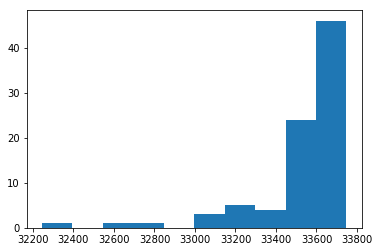

In [50]:
stdev_leave_one_out = np.zeros(len(y))
stemp = y[1:].copy()
stdev_leave_one_out[0] = np.std(stemp)
for i in range(len(y)-1):
    stemp[i] = y[i]
    stdev_leave_one_out[i+1] = np.std(stemp)
plt.hist(stdev_leave_one_out)

(array([ 4.,  6., 24., 23., 11.,  9.,  3.,  2.,  2.,  1.]),
 array([-0.63997243, -0.46411486, -0.28825728, -0.1123997 ,  0.06345788,
         0.23931545,  0.41517303,  0.59103061,  0.76688819,  0.94274576,
         1.11860334]),
 <a list of 10 Patch objects>)

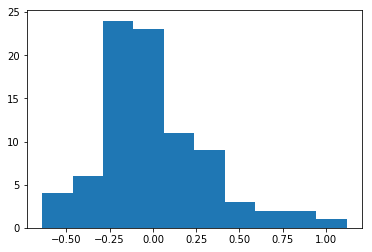

In [56]:
jackknifes = (y-y_hat.reshape(-1,1))/(stdev_leave_one_out.reshape(-1,1)*np.sqrt(1-leverages.reshape(-1,1)))
plt.hist(jackknifes)

And our critical value is, let's say at a $\alpha = .01$ level:

In [57]:
import scipy.stats as ss
alpha = .01
ss.t(len(y) - len(b) - 1).ppf(1-alpha/2)

2.6403400123362197

So in this case, none of the homes in the dataset are considered outliers with strong leverage over the linear relationship that variables have. The last approach is Cook's Distance or Cook's D, which measures how much specific observations in the sample influence the regression line, defined as:

$d_{i} = \frac{\hat{H_{ii}} r_{-i}^{2}}{(1-\hat{H_{ii}})(k+1)}$

Looking at the .01 significance level and reading a table of Cook's D critical values, one can find the critical value to be around 25:

(array([78.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.83073242e-08, 4.48530480e-03, 8.97059128e-03, 1.34558778e-02,
        1.79411643e-02, 2.24264507e-02, 2.69117372e-02, 3.13970237e-02,
        3.58823102e-02, 4.03675967e-02, 4.48528832e-02]),
 <a list of 10 Patch objects>)

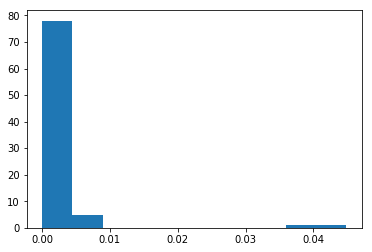

In [60]:
cooks_d = leverages.reshape(-1,1)*(jackknifes)**2 / ((1-leverages.reshape(-1,1))*len(b))
plt.hist(cooks_d)

None of the values are that influential in the regression here either. This makes sense- homes will be prices by sites like Zillow and Trulia and Redfin and so on to sell for the best price possible, and so some research is done to figure out what the price of the house is, but none of these places are that difficult to derive from that. 